In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-dataset/bank.csv


# Story Outline

Goyani Bank, a leading financial institution specializing in Term Deposit Subscriptions, recognizes the significance of refining its marketing strategies for enhanced effectiveness. Leveraging data collected from various campaigns and user interactions, the bank aims to uncover valuable insights that will inform the optimization of future marketing initiatives. This imperative analysis of the last marketing campaign is poised to identify patterns, enabling the institution to draw meaningful conclusions and devise strategic enhancements for future endeavors. The overarching objective is to fortify the bank's market positioning and elevate the success quotient of upcoming marketing campaigns through informed decision-making and tailored strategies. This meticulous approach aligns with Goyani Bank's commitment to delivering exceptional financial solutions and services to its diverse clientele.

DataSet Link : https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset


#  Attributes Description:

## Independet Features
###  Client Data:

1.  age: (numeric)

2.  job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.  marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.  education: (categorical: primary, secondary, tertiary and unknown)
5.  default: has credit in default? (categorical: 'no','yes','unknown')
6.  housing: has housing loan? (categorical: 'no','yes','unknown')
7.  loan: has personal loan? (categorical: 'no','yes','unknown')
8.  balance: Balance of the individual.

### Related with the last contact of the current campaign:

9.  contact: contact communication type (categorical: 'cellular','telephone')

10.  month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11.  day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
12.  duration: last contact duration, in seconds (numeric).

### Other attributes:

13.  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14.  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
15.  previous: number of contacts performed before this campaign and for this client (numeric)
16.  poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Dependent Feature**

17.  deposit: has the client subscribed a term deposit? (binary: 'yes','no')

# Importing Necessary Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default='kaggle'
from plotly import tools
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from IPython.display import display


# Reading the CSV File

In [3]:
df = pd.read_csv('/kaggle/input/bank-marketing-dataset/bank.csv')

In [4]:
def SevenSigma(df):
    """
    Print basic information and statistics of the dataset for better understanding.

    Parameters:
    - df (pd.DataFrame): The input dataset.

    Returns:
    None
    """
    # Display the shape of the dataset
    print(f"Shape of the dataset: {df.shape}")
    print("\n")

    # Display a sample of the dataset
    print("Sample from Dataset:")
    display(df.sample(5).style.background_gradient(cmap='Blues'))
    print("\n")

    # Display general information about the dataset
    print("Information of Dataset:")
    display(df.info())
    print("\n")

    # Display descriptive statistics for numeric features
    print("Description of Dataset for Numeric Features:")
    display(df.describe().T.style.background_gradient(cmap='Blues'))
    print("\n")

    # Display descriptive statistics for categorical features
    print("Description of Dataset for Categorical Features:")
    display(df.describe(exclude=np.number).T.style.background_gradient(cmap='Blues'))
    print("\n")

    # Display correlation heatmap for numeric features
    print("Correlation Heatmap:")
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn', linewidths=0.2)
    fig = plt.gcf()
    fig.set_size_inches(10, 10)
    plt.show()
    print("\n")

    # Display percentage of null values in the dataset
    print("Null Values in Dataset:")
    display(df.isnull().mean() * 100)
    print("\n")

    # Display duplicate rows in the dataset
    print("Duplicate Rows in Dataset:")
    display(df[df.duplicated()].style.background_gradient(cmap='Blues'))


Shape of the dataset: (11162, 17)


Sample from Dataset:




Information of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


None



Description of Dataset for Numeric Features:




Description of Dataset for Categorical Features:




Correlation Heatmap:


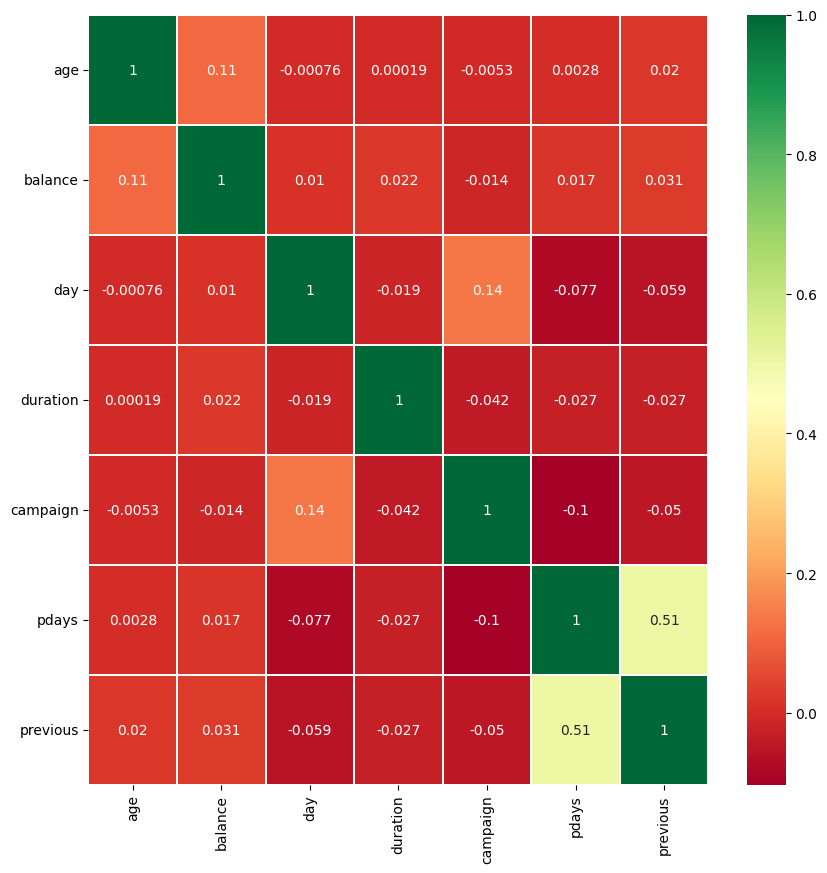



Null Values in Dataset:


age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64



Duplicate Rows in Dataset:


In [5]:
SevenSigma(df)

### Basic Information and Statistics of dataset :

* We have 17 features each have 11162 rows, every rows are unique.
* dataset doen't contains null values
* Balance and Duration features is inbalanced practically it's obvious for that two features.
* alos Balance feature have negative balance that may occure in real world scenario.

# Demographic Analysis:

> Investigation of  how different demographic factors such as age, job, marital status, and education impact the success of marketing campaigns.

In [6]:
# Plot for Distribution of Demographic Elements
fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'box'}, {'type': 'pie'}], [{'type': 'histogram'}, {'type': 'histogram'}]],
                    subplot_titles=['Age Distribution (Box)', 'Job Distribution (Pie)', 'Marital Status Distribution', 'Education Distribution'])

# Adds Violin Plot (Box Plot) to the first subplot
fig.add_trace(go.Violin(x=df['age'], showlegend=False, box_visible=True, line_color='purple', fillcolor='rgba(200, 0, 200, 0.3)'),
              row=1, col=1)

# Adds Pie Chart to the second subplot
fig.add_trace(go.Pie(labels=df['job'], textinfo='label+percent', pull=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
              row=1, col=2)

# Adds Histogram for Marital Status to the third subplot
fig.add_trace(go.Histogram(x=df['marital'], marker_color='green', xbins=dict(size=0.5),showlegend=False),
              row=2, col=1)

# Adds Histogram for Education to the fourth subplot
fig.add_trace(go.Histogram(x=df['education'], marker_color='orange', xbins=dict(size=0.5),showlegend=False),
              row=2, col=2)


fig.update_layout(title_text='Distribution of Demographic Elements', height=800, width=1000, showlegend=True,
                  boxmode='group', 
                  bargap=0.2)  
fig.show()

* most of users age is between 25 - 45
* most of the users are doing managment, blue-coller, technical and admin jobs.
* from dataset more than 50% peoples are married and very few have devorced.
* same for education areound 50% users have completed secondary education.

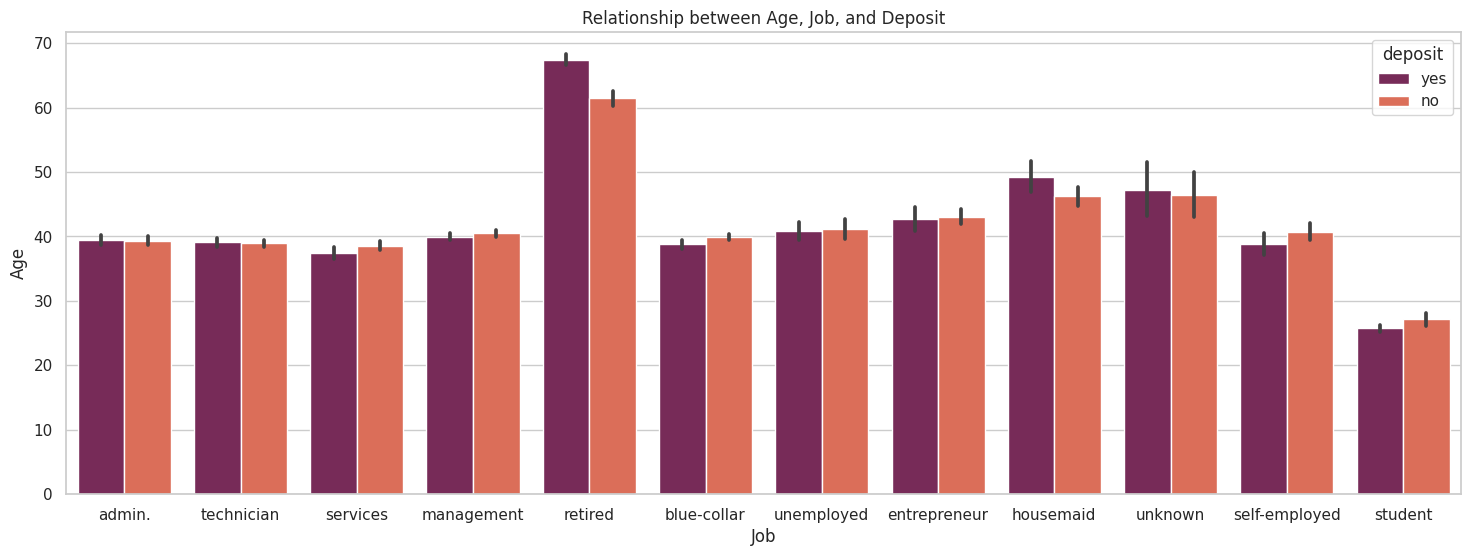

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Set the style of seaborn
sns.set(style="whitegrid")

# Create a grouped bar chart using seaborn
plt.figure(figsize=(18, 6))
sns.barplot(x='job', y='age', hue='deposit', data=df, palette='rocket')

# Set plot labels and title
plt.xlabel('Job')
plt.ylabel('Age')
plt.title('Relationship between Age, Job, and Deposit')

# Show the plot
plt.show()


In [8]:
# Create a cross-tabulation (contingency table) between 'job' and 'deposit'
cross_tab = pd.crosstab(df['job'], df['deposit'])

# Display the cross-tabulation
print("Cross-tabulation between 'job' and 'deposit':")
display(cross_tab)

Cross-tabulation between 'job' and 'deposit':


deposit          no   yes
job                      
admin.          703   631
blue-collar    1236   708
entrepreneur    205   123
housemaid       165   109
management     1265  1301
retired         262   516
self-employed   218   187
services        554   369
student          91   269
technician      983   840
unemployed      155   202
unknown          36    34

* As we can see in above plot and cross tab that retired persons, students, managment and strange but unemployed have high chance to get term deposite from bank.

In [9]:
# Calculate mean and median for 'balance' for each education level
primary_mean = df[df['education'] == 'primary']['balance'].mean()
primary_median = df[df['education'] == 'primary']['balance'].median()

secondary_mean = df[df['education'] == 'secondary']['balance'].mean()
secondary_median = df[df['education'] == 'secondary']['balance'].median()

tertiary_mean = df[df['education'] == 'tertiary']['balance'].mean()
tertiary_median = df[df['education'] == 'tertiary']['balance'].median()

# Display the results
education_stats = pd.DataFrame({
    'Education Level': ['Primary', 'Secondary', 'Tertiary'],
    'Mean Balance': [primary_mean, secondary_mean, tertiary_mean],
    'Median Balance': [primary_median, secondary_median, tertiary_median]
})

print("Mean and Median Balance for Different Education Levels:")
display(education_stats)


Mean and Median Balance for Different Education Levels:


Education Level  Mean Balance  Median Balance
0         Primary   1523.031333           472.0
1       Secondary   1296.480278           494.0
2        Tertiary   1845.869070           658.0

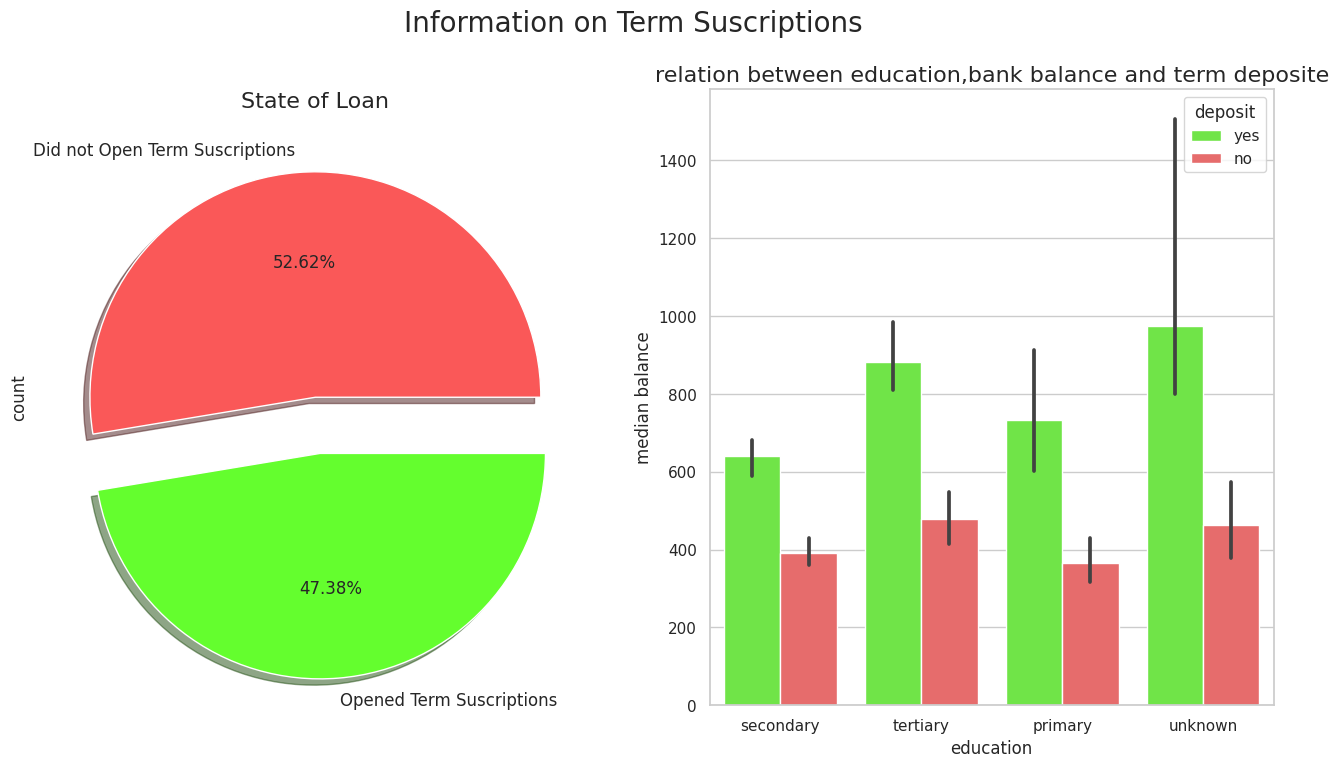

In [10]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12)


ax[0].set_title('State of Loan', fontsize=16)

palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", data=df, hue="deposit",estimator ='median',palette=palette)
ax[1].set(ylabel="median balance")
ax[1].set_title('relation between education,bank balance and term deposite', fontsize=16)
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

* people who hav completed tertiary have higest balance in their account than secondary and than primary same order apply for term deposite subsciption probablity tertiary > secondary > primary.

In [11]:
# Create a facet grid with box plots to explore the relationship between bank balance and marital status
fig=ff.create_facet_grid(
    df,
    y='balance',
    facet_row='marital',
    facet_col='deposit',
    trace_type='box',
    
)
fig.show()

* people who have either divorsed or widow have low bank balance.
* bank balance : married > single > divorced

In [12]:
# Balance Distribution

# Create a Balance Category
df["balance_status"] = np.nan
lst = [df]

for col in lst:
    col.loc[col["balance"] < 0, "balance_status"] = "negative"
    col.loc[(col["balance"] >= 0) & (col["balance"] <= 30000), "balance_status"] = "low"
    col.loc[(col["balance"] > 30000) & (col["balance"] <= 40000), "balance_status"] = "middle"
    col.loc[col["balance"] > 40000, "balance_status"] = "high"
    
# balance by balance_status
negative = df["balance"].loc[df["balance_status"] == "negative"].values.tolist()
low = df["balance"].loc[df["balance_status"] == "low"].values.tolist()
middle = df["balance"].loc[df["balance_status"] == "middle"].values.tolist()
high = df["balance"].loc[df["balance_status"] == "high"].values.tolist()


# Get the average by occupation in each balance category
job_balance = df.groupby(['job', 'balance_status'])['balance'].mean()


trace1 = go.Barpolar(
    r=[-199.0, -392.0, -209.0, -247.0, -233.0, -270.0, -271.0, 0, -276.0, -134.5],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Negative Balance',
    marker=dict(
        color='rgb(246, 46, 46)'
    )
)
trace2 = go.Barpolar(
    r=[319.5, 283.0, 212.0, 313.0, 409.0, 274.5, 308.5, 253.0, 316.0, 330.0],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Low Balance',
    marker=dict(
        color='rgb(246, 97, 46)'
    )
)
trace3 = go.Barpolar(
    r=[2128.5, 2686.0, 2290.0, 2366.0, 2579.0, 2293.5, 2005.5, 2488.0, 2362.0, 1976.0],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Middle Balance',
    marker=dict(
        color='rgb(246, 179, 46)'
    )
)
trace4 = go.Barpolar(
    r=[14247.5, 20138.5, 12278.5, 12956.0, 20723.0, 12159.0, 12223.0, 13107.0, 12063.0, 15107.5],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='High Balance',
    marker=dict(
        color='rgb(46, 246, 78)'
    )
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    title='Mean Balance in Account<br> <i> by Job Occupation</i>',
    font=dict(
        size=12
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='polar-area-chart')

* retired, entrepreneur and unemployed have high bank balance but entrepreneur have also high negative balance.

# Financial Analysis:

In [13]:
# Create subplots
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=['Has Credit in Default?', 'Has Housing Loan?', 'Has Personal Loan?'])



# Add pie charts to the subplots
fig.add_trace(go.Pie(labels=df['default'],pull=[0.1]), row=1, col=1)
fig.add_trace(go.Pie(labels=df['housing'],pull=[0.1]), row=1, col=2)
fig.add_trace(go.Pie(labels=df['loan'],pull=[0.1]), row=1, col=3)

# Update layout
fig.update_layout(title="Default Credit and Loans Information", showlegend=True,
                  legend=dict(orientation="h", yanchor="bottom", y=1.1, xanchor="right", x=1),
                  margin=dict(l=20, r=20, t=50, b=20),
                  height=400, width=1000)

# Show the plot
fig.show()


* half of peopls have taken home loan and very have have personal loan.
* only 1.51% have fails to make required payments on a debt.

In [14]:
# Create a violin plot to show the distribution of balance by deposit status
fig = px.violin(
    df,
    y='deposit',         
    x='balance',         
    color='deposit',     
    box=True,            
    title="Distribution of Balance by Deposit Status",
    labels={'deposit': 'Deposit Status', 'balance': 'Balance'},
    category_orders={'deposit': ['no', 'yes']},
    violinmode="overlay"  
)
# Show the violin plot
fig.show()

* User who have high bank balace have high chance to have term deposit.

In [15]:
# Create cross-tabulation for 'housing' and 'deposit'
housing_deposit_cross_tab = pd.crosstab(df['housing'], df['deposit'])

# Create cross-tabulation for 'loan' and 'deposit'
loan_deposit_cross_tab = pd.crosstab(df['loan'], df['deposit'])

# Display the cross-tabulations side by side
print("Cross-tabulation between 'housing' and 'deposit':")
display(housing_deposit_cross_tab)

print("\n")

print("Cross-tabulation between 'loan' and 'deposit':")
display(loan_deposit_cross_tab)

Cross-tabulation between 'housing' and 'deposit':


deposit    no   yes
housing            
no       2527  3354
yes      3346  1935



Cross-tabulation between 'loan' and 'deposit':


deposit    no   yes
loan               
no       4897  4805
yes       976   484

* there's clear differance that customers who have take any kind of loan didn't shown much interest in term deposit but who have taken loan have high chance to go for deposit.

# Contact Analysis:

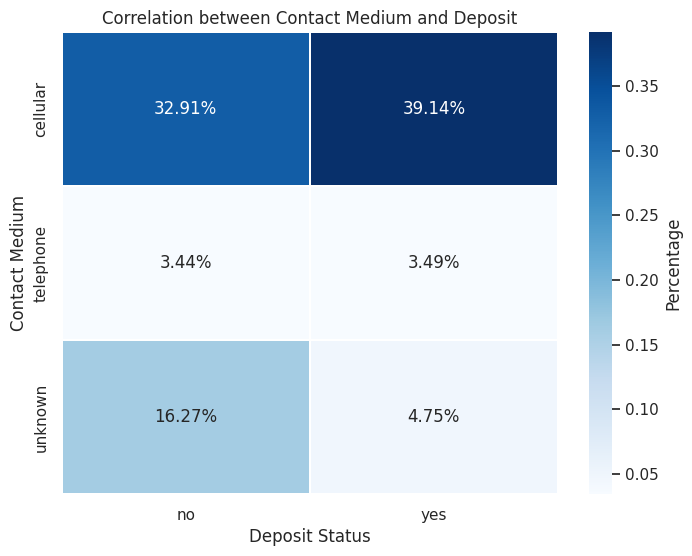

In [16]:
# Create a normalized cross-tabulation for 'contact' and 'deposit'
cross_tab = pd.crosstab(df['contact'], df['deposit'], normalize="all")

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt=".2%", cmap="Blues", linewidths=0.3, cbar_kws={'label': 'Percentage'})

plt.title('Correlation between Contact Medium and Deposit')
plt.xlabel('Deposit Status')
plt.ylabel('Contact Medium')

plt.show()

* among all contact medium cellular proven most effective.

In [17]:
# campaign = number of contact made in campaign
# Filter rows where 'campaign' is greater than 3
campaign_gt_3_counts = df[df['campaign'] > 3]['deposit'].value_counts()

# Filter rows where 'campaign' is less than or equal to 3
campaign_lte_3_counts = df[df['campaign'] <= 3]['deposit'].value_counts()

# Display the counts for 'deposit' variable in both conditions
print("Deposit distribution for 'campaign' greater than 3:")
display(campaign_gt_3_counts)

print("\n")

print("Deposit distribution for 'campaign' less than or equal to 3:")
display(campaign_lte_3_counts)

Deposit distribution for 'campaign' greater than 3:


deposit
no     1306
yes     709
Name: count, dtype: int64



Deposit distribution for 'campaign' less than or equal to 3:


deposit
yes    4580
no     4567
Name: count, dtype: int64

* if we calls customer more than three times then there very few chance that they we subscribe for deposite.
* for less than 3 contact there's high number of customer who have taken deposite means customer don't wants too much contatcs within few calls we can get result after that it's waste of time.

# Temporal Analysis:

In [18]:
# Create a subplot with one row and two columns
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'histogram'}, {'type': 'pie'}]])

# Add a histogram for the 'day' column
fig.add_trace(go.Histogram(x=df['day'],showlegend=False), row=1, col=1)

# Add a pie chart for the 'month' column
fig.add_trace(go.Pie(labels=df['month'],textinfo='label+percent', pull=[0.1]), row=1, col=2)

fig.update_layout(title_text='Distribution of Day and Month')
fig.show()

* in day's distribution we can see that there paur seasonality 
* for month's distribution most of the calls are made in may,augest,july,june and november.

In [19]:
# Create a DataFrame with cross-tabulation of 'month' and 'deposit'
months_sr = pd.DataFrame(pd.crosstab(df['month'], df['deposit']))

# Calculate the ratio of 'yes' to 'no' for each month
months_ratio = months_sr['yes'] / months_sr['no']

# Create a bar plot with improved visuals
fig = px.bar(
    x=list(months_sr.index),   
    y=months_ratio,
    text_auto=".2f",                    
    color=months_ratio,               
    color_continuous_scale='viridis',  
    labels={'x': 'Month', 'y': 'Deposit Ratio (Yes/No)'},
    title='Month-wise Term Deposit Ratio (Yes/No)',
)

# Sort bars by the ratio in descending order
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [20]:
# Create a DataFrame with cross-tabulation of 'day' and 'deposit'
days_sr = pd.DataFrame(pd.crosstab(df['day'], df['deposit']))

# Calculate the ratio of 'yes' to 'no' for each day
days_ratio = days_sr['yes'] / days_sr['no']

# Create a bar plot with improved visuals
fig = px.bar(
    x=list(days_sr.index), 
    y=days_ratio,
    text_auto=".2f",
    color=days_ratio,             
    color_continuous_scale='viridis',  
    labels={'x': 'Day', 'y': 'Deposit Ratio (Yes/No)'},
    title='Day-wise Term Deposit Ratio (Yes/No)',
)

# Sort bars by the ratio in descending order
fig.update_xaxes(categoryorder='total descending')
fig.show()

* success rate for bank is high in december, march, september and october month.
* in Day-wise term deposit ration theres seasonality.

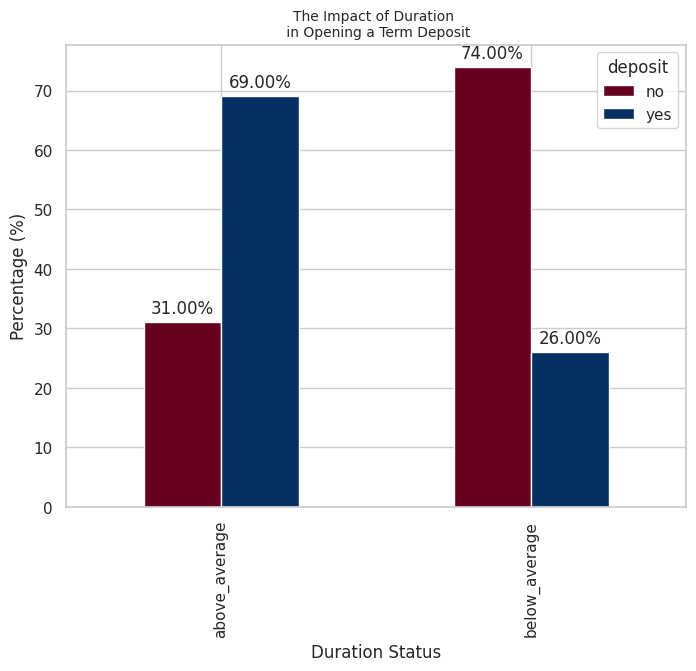

In [21]:
# Calculate the median duration
avg_duration = df['duration'].median()

# Create a new column 'duration_status' to categorize durations
df["duration_status"] = np.nan
df.loc[df["duration"] < avg_duration, "duration_status"] = "below_average"
df.loc[df["duration"] > avg_duration, "duration_status"] = "above_average"

# Calculate the percentage of term deposits for each duration status
pct_term = pd.crosstab(df['duration_status'], df['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)

# Plot the percentage of term deposits based on duration status
ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu', figsize=(8, 6))
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=10)
plt.xlabel("Duration Status")
plt.ylabel("Percentage (%)")

# Annotate each bar with its respective percentage
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

* duration of call is highly corelated feature if we talk longer time with customer than there's high chance that customer will go for deposite and if we duration of talk is less it means theres few chance for it.

# Previous Campaign Performance Analysis:

In [22]:
px.scatter(df,y='previous',color='poutcome')